In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My\ Drive/ML/Assignment_3/

/content/gdrive/My Drive/ML/Assignment_3


In [3]:
# !gdown --id 1n0j5zbMXMVnLPUqadFNcCxiZRu0ChoXL
# !unzip "Programming_Assignment_3.zip" -d ""

In [4]:
%ls

21100088.ipynb          Programming_Assignment_3.zip  train.csv
Dataset/                test.csv                      train_features.xlsx
LogisticRegression.pdf  test_features.xlsx


#Libraries

In [5]:
import numpy as np
import pandas as pd
import os
import glob
import string
import re 
from collections import Counter
import array
import math

#Extracting Data into Variables

In [ ]:
train_pos_files = os.listdir("Dataset/train/pos")
train_neg_files = os.listdir("Dataset/train/neg")

In [ ]:
test_pos_files = os.listdir("Dataset/test/pos")
test_neg_files = os.listdir("Dataset/test/neg")

In [ ]:
with open('Dataset/negative_words.txt', encoding = "ISO-8859-1") as n:
  neg = n.readlines()

In [ ]:
with open('Dataset/positive_words.txt', encoding = "ISO-8859-1") as p:
  pos = p.readlines()

In [ ]:
with open('Dataset/stop_words.txt', encoding = "ISO-8859-1") as s:
  stop = s.readlines()

In [ ]:
stop_words = []
neg_words = []
pos_words = []
for x in neg:
  word = x.strip()
  neg_words.append(word)

for y in pos:
  word = y.strip()
  pos_words.append(word)

for z in stop:
  word = z.strip()
  stop_words.append(word)

In [ ]:
pos_words_upd = [i for i in pos_words if i not in stop_words]
# print(pos_words_upd)

In [ ]:
neg_words_upd = [i for i in neg_words if i not in stop_words]
# print(neg_words_upd)

In [ ]:
def file_read(filename,directory):

  pos_count = 0
  neg_count = 0
  with open(os.path.join(directory, filename)) as n:
    data = n.readlines()
  
  data = data[0].lower()
  # print(data)
  
  data = data.split()
  data_upd = list()

  for word in data:
    word = re.sub('[@&%*/-/+/.,!0-9]*', '', word)
    item = word.strip(string.punctuation) #Remove punctuations
    if item not in stop_words and item is not '': 
      data_upd.append(item)
  
  # print(data_upd)
  word_freq = Counter(data_upd)

  keys = word_freq.keys()

  # print(word_freq['student'])

  for word in pos_words_upd:
    if word in keys:
      pos_count += word_freq[word]
  
  for word in neg_words_upd:
    if word in keys:
      neg_count += word_freq[word]

  return pos_count,neg_count

## Reading Files 

In [ ]:
x0 = []
x1 = []
x2 = []
y_train = []

for filename in train_pos_files:
  p, n = file_read(filename,"Dataset/train/pos")
  # print(p,n)
  x1.append(p)
  x2.append(n)
  y_train.append(1)

In [ ]:
for filename in train_neg_files:
  p, n = file_read(filename,"Dataset/train/neg")
  x1.append(p)
  x2.append(n)
  y_train.append(0)

In [ ]:
y_test = []
tx0 = []
tx1 = []
tx2 = []

In [ ]:

for filename in test_pos_files:
  p, n = file_read(filename,"Dataset/test/pos")
  # print(p,n)
  tx1.append(p)
  tx2.append(n)
  y_test.append(1)

for filename in test_neg_files:
  p, n = file_read(filename,"Dataset/test/neg")
  tx1.append(p)
  tx2.append(n)
  y_test.append(0)

In [ ]:
print(len(tx1)) #25000
print(len(tx2)) # 25000
print(len(y_test))
print(len(test_pos_files)+len(test_neg_files))

In [ ]:
x0 = np.ones(len(x1))
train_X = [x0, x1, x2]

tx0 = np.ones(len(tx1))
test_X = [tx0, tx1, tx2]


In [ ]:
save_train = train_X
save_test = test_X

train_label = y_train
test_label = y_test


In [ ]:
# train_label

## Saving in Excel

In [ ]:
import pandas as pd

sets = {'X0': save_train[0] , 'X1': save_train[1], 'X2': save_train[2] , 'Y': train_label}

df = pd.DataFrame(sets, columns = ['X0', 'X1', 'X2','Y'])

# print (df)

In [ ]:
df.to_excel('train_features.xlsx')

In [ ]:
import pandas as pd

cars = {'X0': save_test[0] , 'X1': save_test[1], 'X2': save_test[2] , 'Y': test_label}

dt = pd.DataFrame(cars, columns = ['X0', 'X1', 'X2','Y'])

# print (dt)

In [ ]:
dt.to_excel('test_features.xlsx')

## Saving in csv file

In [ ]:
import pandas as pd

sets = {'X0': save_train[0] , 'X1': save_train[1], 'X2': save_train[2]}

df = pd.DataFrame(sets, columns = ['X0', 'X1', 'X2'])

# print (df)

In [ ]:
df.to_csv('train.csv')

In [ ]:
import pandas as pd

cars = {'X0': save_test[0] , 'X1': save_test[1], 'X2': save_test[2]}

dt = pd.DataFrame(cars, columns = ['X0', 'X1', 'X2'])

# print (dt)

In [ ]:
dt.to_csv('test.csv')

In [ ]:
train_data = pd.read_csv('train.csv')
print(train_data)

# Functions for Logistic Regression


In [6]:
def sigmoid(X,theta):
  h_x = []
  # X = np.asarray(X)
  # X = X.transpose()
  # print(theta.shape)
  z = np.dot(theta,X)
  h_x = 1 / (1 + np.exp(-z))
  # plt.plot(h_x)

  return h_x

In [38]:
def cost(X,Y,theta):

  Y = np.array(Y)
  a = (Y * np.log(sigmoid(X,theta)))
  b = ((1-Y) * np.log(1-sigmoid(X,theta)))
  s = 0.0
  m = len(Y)

  for i in range(m):

    c = - a[i] - b[i]
    s = s + c

  cost = 1/m * s
  return c

In [47]:
def Batch_Descent(X,Y,alpha,n_epoch):

  m = len(Y)
  n = len(X)
  J1 = list()
  # print(n)
  thresh = 0.5
  theta = []
  temp_theta = []
  theta = np.zeros(n)
  temp_theta = np.zeros(n)

  for epoch in range(n_epoch):
    s = 0.0

    # for j in range(n):
      
    for i in range(m):
        # h_theta = pred(hx,thresh)
      d = sigmoid(X[:,i],theta) - Y[i]

      s = s + d*X[:,i]
              # print("Hello loser")

    temp_theta = theta - alpha * (1/m) * s
      # print("not stuch1")
    theta = temp_theta
    # print("haris")
    J = cost(X,Y,theta)
    J1.append(J)
    # print(J1)
  return theta,J1


In [18]:
def prediction(test_X,y_test,thresh,Theta):

  pred_labels = np.zeros(len(y_test))
  # pred_labels = []
  m = len(y_test)
  test_X = np.asarray(test_X)
  for i in range (m):
      a = sigmoid(test_X[:,i],Theta)
      # print(Theta)
      if a >= thresh:
          pred_labels[i] = 1
      elif a < thresh:
          pred_labels[i] = 0

  return pred_labels

In [19]:
def Confusion_matrix (y_test,pred_label): #Gold labels, System generated labels 
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    m= len(pred_label)
    # print(m)

    for i in range (m):
      if pred_label[i] == y_test[i]:
        if pred_label[i] == 1:
          tp += 1
        elif pred_label[i] == 0:
          tn += 1
      elif pred_label[i] != y_test[i]:
        if pred_label[i] == 0:
          fn += 1
        elif pred_label[i] == 1:
          fp += 1
    
    return np.array([tp, tn, fp, fn])

In [20]:
def accuracy(tp,tn,fp,fn):  ## passing a 2D matrix and calculting performance
  acc = ((tp+tn)/(tp+tn+fp+fn))*100
  return acc

In [21]:
def precision(tp,tn,fp,fn): ## 
  prec_0 = ((tp)/(tp+fp))
  prec_1 = ((tn)/(tn+fn))

  prec = (prec_0 + prec_1)/2 #Calculating Macro precision

  return prec

In [22]:
def recall(tp,tn,fp,fn): 
  rec_0 = ((tp)/(tp+fn))
  rec_1 = ((tn)/(tn+fp))

  rec = (rec_0 + rec_1)/2 #macro recall

  return rec

In [23]:
def F1_score(p,r):  ## precision and recall
  f1 = ((2*p*r)/(p+r))

  return f1

# MAIN FUNCTION Part 1

## Reading Excel File

In [24]:
train_feature = pd.read_excel('train_features.xlsx')

In [25]:
train_X0 = train_feature['X0']
train_X1 = train_feature['X1']
train_X2 = train_feature['X2']

In [26]:
train_X0 = train_X0.tolist()
train_X1 = train_X1.tolist()
train_X2 = train_X2.tolist()

In [27]:
train_X_data = [train_X0 , train_X1, train_X2]

In [28]:
train_X_data = np.asarray(train_X_data)
train_label_data = train_feature['Y']

In [29]:
# train_label_data.shape

In [30]:
test_feature = pd.read_excel('test_features.xlsx')

In [31]:
test_X0 = test_feature['X0']
test_X1 = test_feature['X1']
test_X2 = test_feature['X2']

In [32]:
test_X0 = test_X0.tolist()
test_X1 = test_X1.tolist()
test_X2 = test_X2.tolist()

In [33]:
test_X_data = [test_X0 , test_X1, test_X2]

In [34]:
test_X_data = np.asarray(test_X_data)
test_label_data = test_feature['Y']

In [35]:
test_X_data.shape

(3, 25000)

## Testing

In [36]:
import matplotlib.pyplot as plt

In [53]:
alpha = 0.01
n_ep = 1500
J1 = list()

T , J = Batch_Descent(train_X_data,train_label_data,alpha,n_ep)
# J1.append(J[len(J)-1])
print(T)
print(J)

[-0.16848503  0.19578579 -0.18518325]
[0.689274608129062, 0.6852222486703938, 0.6813327551312578, 0.6776817623527376, 0.6742695255822208, 0.6710774574190855, 0.6680841935368184, 0.6652698999198488, 0.6626171689009039, 0.6601109449993642, 0.6577382127981815, 0.6554876666759908, 0.6533494222839534, 0.6513147792767253, 0.6493760300040065, 0.6475263057503119, 0.6457594526275199, 0.6440699306402051, 0.6424527308661474, 0.6409033068786887, 0.6394175174587982, 0.6379915783404813, 0.6366220212537678, 0.6353056589183037, 0.6340395549326016, 0.6328209977243645, 0.6316474778955906, 0.6305166684253501, 0.6294264072937695, 0.6283746821694367, 0.6273596168648802, 0.6263794593146249, 0.6254325708703482, 0.6245174167402168, 0.6236325574261724, 0.6227766410346582, 0.6219483963545045, 0.6211466266107826, 0.620370203815951, 0.6196180636504045, 0.6188892008133757, 0.618182664792862, 0.6174975560096758, 0.6168330222963886, 0.6161882556765718, 0.6155624894139682, 0.6149549953047535, 0.6143650811891164, 0.61

Text(0.5, 1.0, 'Training Loss vs Iterations ')

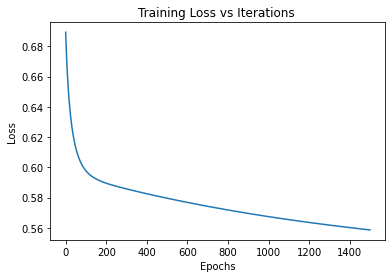

In [54]:
# print(J)
plt.plot(J)
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.legend(labels, bbox_to_anchor = (1, 1))
plt.title('Training Loss vs Iterations ')

In [55]:
thresh = 0.5
pred_test = prediction(test_X_data,test_label_data,thresh,T)
C = Confusion_matrix(test_label_data,pred_test)

In [56]:
tp = []
tn = []
fp = []
fn = []
tp = C[0]
tn = C[1]
fp = C[2]
fn = C[3]

p = precision(tp,tn,fp,fn)*100
r = recall(tp,tn,fp,fn)*100

f1 = F1_score(p,r)

ac = accuracy(tp,tn,fp,fn)

print('Accuracy = ', ac)
print('Precision = ',p)
print('Recall = ',r)
print('F1 Measure = ', f1)

Accuracy =  73.34
Precision =  73.36526005179654
Recall =  73.34
F1 Measure =  73.35262785123113


In [57]:
print(tp,tn,fp,fn)

9373 8962 3538 3127


# Main Function sklearn

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [59]:
confuse = []
clf = LogisticRegression()
train_X_sk = train_X_data.transpose()
# print(train_X_sk.shape)
# print(train_label_data.shape)
test_X_sk = test_X_data.transpose()
clf.fit(train_X_sk,train_label_data)
pred_test = clf.predict(test_X_sk)

accuracy = accuracy_score(test_label_data,pred_test)
confuse = confusion_matrix(test_label_data,pred_test)

print("Accuracy using sk-learn is = " ,accuracy*100)
print("Confusion Matrix sklearn is ")
print(confuse)


Accuracy using sk-learn is =  73.136
Confusion Matrix sklearn is 
[[9154 3346]
 [3370 9130]]
